# The General Manager wants to know the risks involved with contract extensions. When do players, on average, hit their peak? When is it a good time to extend a player or let him go in free agency?

## What factors (if any) affect the players production?

Age

City(team)

Total minutes played

Games played

## Perform analysis using the nba dataset and report back your findings.

In [1]:
# import libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
# read the csv file

data = pd.read_csv('NBA_Stats_1950_2021_raw.csv')
data.head()

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,1950,Curly Armstrong,FTW,63.0,NaN,144.0,516.0,NaN,NaN,170.0,241.0,NaN,217.0,NaN,NaN,NaN,176.0,NaN,NaN,458.0
1,1950,Cliff Barker,INO,49.0,NaN,102.0,274.0,NaN,NaN,75.0,106.0,NaN,99.0,NaN,NaN,NaN,109.0,NaN,NaN,279.0
2,1950,Leo Barnhorst,CHS,67.0,NaN,174.0,499.0,NaN,NaN,90.0,129.0,NaN,192.0,NaN,NaN,NaN,140.0,NaN,NaN,438.0
3,1950,Ed Bartels,TOT,15.0,NaN,22.0,86.0,NaN,NaN,19.0,34.0,NaN,29.0,NaN,NaN,NaN,20.0,NaN,NaN,63.0
4,1950,Ed Bartels,DNN,13.0,NaN,21.0,82.0,NaN,NaN,17.0,31.0,NaN,27.0,NaN,NaN,NaN,20.0,NaN,NaN,59.0


In [40]:
# Select 5 random players with at least 10 entries

random_players = data['Player'].value_counts()
random_players = random_players[random_players >= 10].sample(5).index
random_players

Index(['Spencer Haywood*', 'Mike Conley', 'Will Perdue', 'Don Ohl',
       'Charlie Ward'],
      dtype='object', name='Player')

# NOTE: 

When I originally ran this the 5 players who were returned were:

Glen Rice
Andrea Bargnani
Voshon Lenard
Kenny Anderson
B.J. Armstrong

These are the 5 players that I will use for this analysis.

# Method

I have randomnly selected 5 players from the dataset that each had at least 10 entries.  I will look at each player and gather their;
Games Player(GP)
Minutes(MIN)
Turnovers(TOV)
Personal Fouls(PF)
Rebounds(REB)
Assists(AST)
Points(PTS)

As General Manger(GM), these are metrics I value most.  I will then analyze each player to determine their Peak, when to extend the contract or decline at let the player leave through Free Agency.  I decided on a length of 3 years for metric to decide when it would a decision would need to be made whether to extend or decline a new contract.

# Glen Rice

In [3]:
# Select all entries for 'Glen Rice' from data

glen_rice_data = data[data['Player'] == 'Glen Rice']
glen_rice_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
9834,1990,Glen Rice,MIA,77.0,2311.0,470.0,1071.0,17.0,69.0,91.0,124.0,113.0,198.0,100.0,252.0,352.0,138.0,67.0,27.0,1048.0
10288,1991,Glen Rice,MIA,77.0,2646.0,550.0,1193.0,71.0,184.0,171.0,209.0,166.0,216.0,85.0,296.0,381.0,189.0,101.0,26.0,1342.0
10746,1992,Glen Rice,MIA,79.0,3007.0,672.0,1432.0,155.0,396.0,266.0,318.0,145.0,170.0,84.0,310.0,394.0,184.0,90.0,35.0,1765.0
11192,1993,Glen Rice,MIA,82.0,3082.0,582.0,1324.0,148.0,386.0,242.0,295.0,157.0,201.0,92.0,332.0,424.0,180.0,92.0,25.0,1554.0
11679,1994,Glen Rice,MIA,81.0,2999.0,663.0,1421.0,132.0,346.0,250.0,284.0,130.0,186.0,76.0,358.0,434.0,184.0,110.0,32.0,1708.0
12127,1995,Glen Rice,MIA,82.0,3014.0,667.0,1403.0,185.0,451.0,312.0,365.0,153.0,203.0,99.0,279.0,378.0,192.0,112.0,14.0,1831.0
12641,1996,Glen Rice,CHH,79.0,3142.0,610.0,1296.0,171.0,403.0,319.0,381.0,163.0,217.0,86.0,292.0,378.0,232.0,91.0,19.0,1710.0
13216,1997,Glen Rice,CHH,79.0,3362.0,722.0,1513.0,207.0,440.0,464.0,535.0,177.0,190.0,67.0,251.0,318.0,160.0,72.0,26.0,2115.0
13742,1998,Glen Rice,CHH,82.0,3295.0,634.0,1386.0,130.0,300.0,428.0,504.0,182.0,200.0,89.0,264.0,353.0,182.0,77.0,22.0,1826.0
14296,1999,Glen Rice,LAL,27.0,985.0,171.0,396.0,53.0,135.0,77.0,90.0,45.0,67.0,9.0,90.0,99.0,71.0,17.0,6.0,472.0


In [4]:
glen_rice_data[['Year', 'GP', 'MIN', 'TOV', 'PF', 'REB', 'AST', 'PTS']]

,Year,GP,MIN,TOV,PF,REB,AST,PTS
9834,1990,77.0,2311.0,113.0,198.0,352.0,138.0,1048.0
10288,1991,77.0,2646.0,166.0,216.0,381.0,189.0,1342.0
10746,1992,79.0,3007.0,145.0,170.0,394.0,184.0,1765.0
11192,1993,82.0,3082.0,157.0,201.0,424.0,180.0,1554.0
11679,1994,81.0,2999.0,130.0,186.0,434.0,184.0,1708.0
12127,1995,82.0,3014.0,153.0,203.0,378.0,192.0,1831.0
12641,1996,79.0,3142.0,163.0,217.0,378.0,232.0,1710.0
13216,1997,79.0,3362.0,177.0,190.0,318.0,160.0,2115.0
13742,1998,82.0,3295.0,182.0,200.0,353.0,182.0,1826.0
14296,1999,27.0,985.0,45.0,67.0,99.0,71.0,472.0


In [5]:
# Rice Stats averaged by GP

glen_rice_data['MIN/GP'] = glen_rice_data['MIN'] / glen_rice_data['GP']
glen_rice_data['TOV/GP'] = glen_rice_data['TOV'] / glen_rice_data['GP']
glen_rice_data['PF/GP'] = glen_rice_data['PF'] / glen_rice_data['GP']
glen_rice_data['REB/GP'] = glen_rice_data['REB'] / glen_rice_data['GP']
glen_rice_data['AST/GP'] = glen_rice_data['AST'] / glen_rice_data['GP']
glen_rice_data['PTS/GP'] = glen_rice_data['PTS'] / glen_rice_data['GP']

glen_rice_data[['Year', 'GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].round(2)

/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/3247828792.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glen_rice_data['MIN/GP'] = glen_rice_data['MIN'] / glen_rice_data['GP']
/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/3247828792.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  glen_rice_data['TOV/GP'] = glen_rice_data['TOV'] / glen_rice_data['GP']
/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/3247828792.py:5: SettingWithCopyWarning: 
A val

,Year,GP,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
9834,1990,77.0,30.01,1.47,2.57,4.57,1.79,13.61
10288,1991,77.0,34.36,2.16,2.81,4.95,2.45,17.43
10746,1992,79.0,38.06,1.84,2.15,4.99,2.33,22.34
11192,1993,82.0,37.59,1.91,2.45,5.17,2.20,18.95
11679,1994,81.0,37.02,1.60,2.30,5.36,2.27,21.09
12127,1995,82.0,36.76,1.87,2.48,4.61,2.34,22.33
12641,1996,79.0,39.77,2.06,2.75,4.78,2.94,21.65
13216,1997,79.0,42.56,2.24,2.41,4.03,2.03,26.77
13742,1998,82.0,40.18,2.22,2.44,4.30,2.22,22.27
14296,1999,27.0,36.48,1.67,2.48,3.67,2.63,17.48


In [6]:
# Create correlation matrix

rice_corr_matrix = glen_rice_data[['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].corr()
rice_corr_matrix

,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
MIN/GP,1.000000,0.925322,0.722407,0.856014,0.876371,0.949629
TOV/GP,0.925322,1.000000,0.698875,0.845016,0.865314,0.936597
PF/GP,0.722407,0.698875,1.000000,0.694540,0.682914,0.706593
REB/GP,0.856014,0.845016,0.694540,1.000000,0.836157,0.853196
AST/GP,0.876371,0.865314,0.682914,0.836157,1.000000,0.850955
PTS/GP,0.949629,0.936597,0.706593,0.853196,0.850955,1.000000


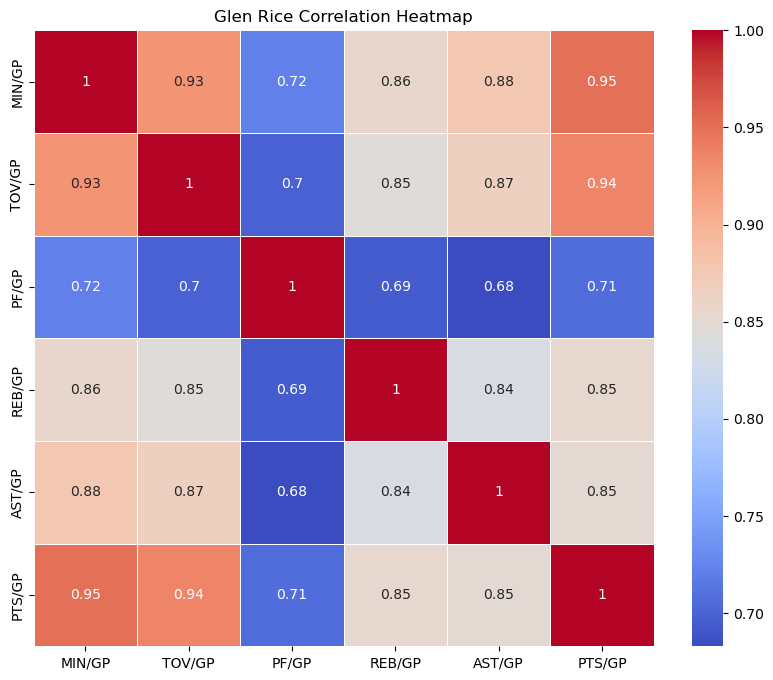

In [7]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(rice_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Glen Rice Correlation Heatmap')
plt.show()

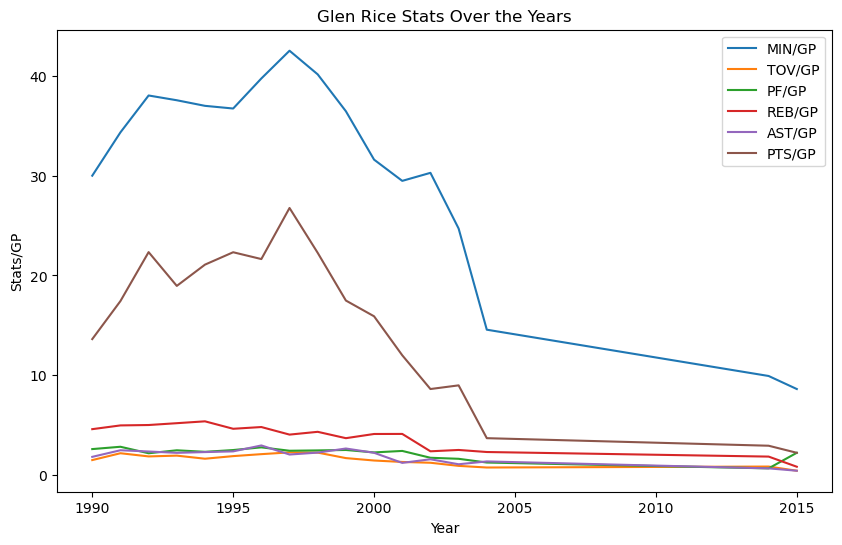

In [8]:
# Plot of Rice Career

glen_rice_data.plot(x='Year', y=['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP'], kind='line', figsize=(10, 6))
plt.title('Glen Rice Stats Over the Years')
plt.xlabel('Year')
plt.ylabel('Stats/GP')
plt.show()

In [9]:
# Glen Rice Career Averages

glen_rice_averages = glen_rice_data[['GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].mean()
glen_rice_averages

GP        59.764706
MIN/GP    30.705426
TOV/GP     1.515690
PF/GP      2.164916
REB/GP     3.784569
AST/GP     1.855881
PTS/GP    15.185018
dtype: float64

# GM Decision

### Peak

Rice hit his statistical peak during the 1997 season.  His Minutes per Game(Min/GP), Points per Game(PTS/GP) and Games Played(GP) were all at or near their highest during his career.  Though he did have higher averages in REB and AST in other seasons, the 1997 season averages were not too far off.

### Extend?
From his inital season in 1990 through 1992 there was significant positive increases across all my valued metrics.  Happily, Ill extend him.  Though there was a slight dip from 1992 to 1993, in 1994 and 1995 there was more positive increases across all categories.  We will extend him, again.  During the 1996 season Rice remained consistent and reached his statistical Peak during the 1997 season. 1998 was saw a slight decrease in his overeall numbers but we will extend him again based the past three seasons.  The decline for Rice began during the 1999 season, this looks likely due to an injury or other issue that led him to only play in 27 games where in all seasons prior he had played in at least 77.  In 2000 and 2001 Rice continued his decline and sadly, his time with our team has come to an end.

### Let Him Go?
Rice will be let go after the 2001 season.  His GP remained good but all my other metrics showed decline.  This decision was backed up by the remaining years of his career where he never came close to reaching his peak performance of the 1997 season.

# Andrea Bargnani

In [10]:
# Select all entries for 'Andrea Bargnani' from data

andrea_bargnani_data = data[data['Player'] == 'Andrea Bargnani']
andrea_bargnani_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
18196,2007,Andrea Bargnani,TOR,65.0,1629.0,267.0,625.0,100.0,268.0,117.0,142.0,107.0,180.0,52.0,203.0,255.0,50.0,32.0,53.0,751.0
18721,2008,Andrea Bargnani,TOR,78.0,1861.0,280.0,725.0,90.0,261.0,142.0,169.0,88.0,211.0,50.0,238.0,288.0,89.0,23.0,37.0,792.0
19317,2009,Andrea Bargnani,TOR,78.0,2453.0,431.0,958.0,119.0,291.0,221.0,266.0,135.0,242.0,70.0,346.0,416.0,94.0,34.0,97.0,1202.0
19895,2010,Andrea Bargnani,TOR,80.0,2799.0,537.0,1143.0,121.0,325.0,181.0,234.0,120.0,215.0,105.0,388.0,493.0,93.0,25.0,111.0,1376.0
20484,2011,Andrea Bargnani,TOR,66.0,2353.0,525.0,1173.0,77.0,223.0,287.0,350.0,152.0,160.0,74.0,269.0,343.0,119.0,34.0,46.0,1414.0
21096,2012,Andrea Bargnani,TOR,31.0,1032.0,209.0,484.0,34.0,115.0,151.0,173.0,69.0,52.0,24.0,148.0,172.0,61.0,18.0,15.0,603.0
21651,2013,Andrea Bargnani,TOR,35.0,1003.0,170.0,426.0,38.0,123.0,65.0,77.0,54.0,64.0,26.0,102.0,128.0,38.0,21.0,23.0,443.0
22232,2014,Andrea Bargnani,NYK,42.0,1257.0,222.0,502.0,30.0,108.0,84.0,102.0,58.0,100.0,69.0,153.0,222.0,45.0,14.0,52.0,558.0
22836,2015,Andrea Bargnani,NYK,29.0,785.0,164.0,361.0,15.0,41.0,87.0,107.0,42.0,53.0,32.0,95.0,127.0,46.0,2.0,27.0,430.0
23487,2016,Andrea Bargnani,BRK,46.0,634.0,127.0,279.0,3.0,16.0,47.0,57.0,26.0,61.0,28.0,69.0,97.0,18.0,4.0,9.0,304.0


In [11]:
# Bargnani Career Stats

andrea_bargnani_data[['Year', 'GP', 'MIN', 'TOV', 'PF', 'REB', 'AST', 'PTS']]

,Year,GP,MIN,TOV,PF,REB,AST,PTS
18196,2007,65.0,1629.0,107.0,180.0,255.0,50.0,751.0
18721,2008,78.0,1861.0,88.0,211.0,288.0,89.0,792.0
19317,2009,78.0,2453.0,135.0,242.0,416.0,94.0,1202.0
19895,2010,80.0,2799.0,120.0,215.0,493.0,93.0,1376.0
20484,2011,66.0,2353.0,152.0,160.0,343.0,119.0,1414.0
21096,2012,31.0,1032.0,69.0,52.0,172.0,61.0,603.0
21651,2013,35.0,1003.0,54.0,64.0,128.0,38.0,443.0
22232,2014,42.0,1257.0,58.0,100.0,222.0,45.0,558.0
22836,2015,29.0,785.0,42.0,53.0,127.0,46.0,430.0
23487,2016,46.0,634.0,26.0,61.0,97.0,18.0,304.0


In [12]:
# Bargnani stats by GP


andrea_bargnani_data['MIN/GP'] = andrea_bargnani_data['MIN'] / andrea_bargnani_data['GP']
andrea_bargnani_data['TOV/GP'] = andrea_bargnani_data['TOV'] / andrea_bargnani_data['GP']
andrea_bargnani_data['PF/GP'] = andrea_bargnani_data['PF'] / andrea_bargnani_data['GP']
andrea_bargnani_data['REB/GP'] = andrea_bargnani_data['REB'] / andrea_bargnani_data['GP']
andrea_bargnani_data['AST/GP'] = andrea_bargnani_data['AST'] / andrea_bargnani_data['GP']
andrea_bargnani_data['PTS/GP'] = andrea_bargnani_data['PTS'] / andrea_bargnani_data['GP']

andrea_bargnani_data[['Year', 'GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].round(2)

/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/1616262926.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andrea_bargnani_data['MIN/GP'] = andrea_bargnani_data['MIN'] / andrea_bargnani_data['GP']
/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/1616262926.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  andrea_bargnani_data['TOV/GP'] = andrea_bargnani_data['TOV'] / andrea_bargnani_data['GP']
/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/1616262926.

,Year,GP,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
18196,2007,65.0,25.06,1.65,2.77,3.92,0.77,11.55
18721,2008,78.0,23.86,1.13,2.71,3.69,1.14,10.15
19317,2009,78.0,31.45,1.73,3.10,5.33,1.21,15.41
19895,2010,80.0,34.99,1.50,2.69,6.16,1.16,17.20
20484,2011,66.0,35.65,2.30,2.42,5.20,1.80,21.42
21096,2012,31.0,33.29,2.23,1.68,5.55,1.97,19.45
21651,2013,35.0,28.66,1.54,1.83,3.66,1.09,12.66
22232,2014,42.0,29.93,1.38,2.38,5.29,1.07,13.29
22836,2015,29.0,27.07,1.45,1.83,4.38,1.59,14.83
23487,2016,46.0,13.78,0.57,1.33,2.11,0.39,6.61


In [13]:
# Create correlation matrix

bargnani_corr_matrix = andrea_bargnani_data[['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].corr()
bargnani_corr_matrix

,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
MIN/GP,1.000000,0.850336,0.426292,0.928730,0.756762,0.921313
TOV/GP,0.850336,1.000000,0.258239,0.704725,0.824683,0.911134
PF/GP,0.426292,0.258239,1.000000,0.481510,0.005814,0.203761
REB/GP,0.928730,0.704725,0.481510,1.000000,0.657571,0.835947
AST/GP,0.756762,0.824683,0.005814,0.657571,1.000000,0.879065
PTS/GP,0.921313,0.911134,0.203761,0.835947,0.879065,1.000000


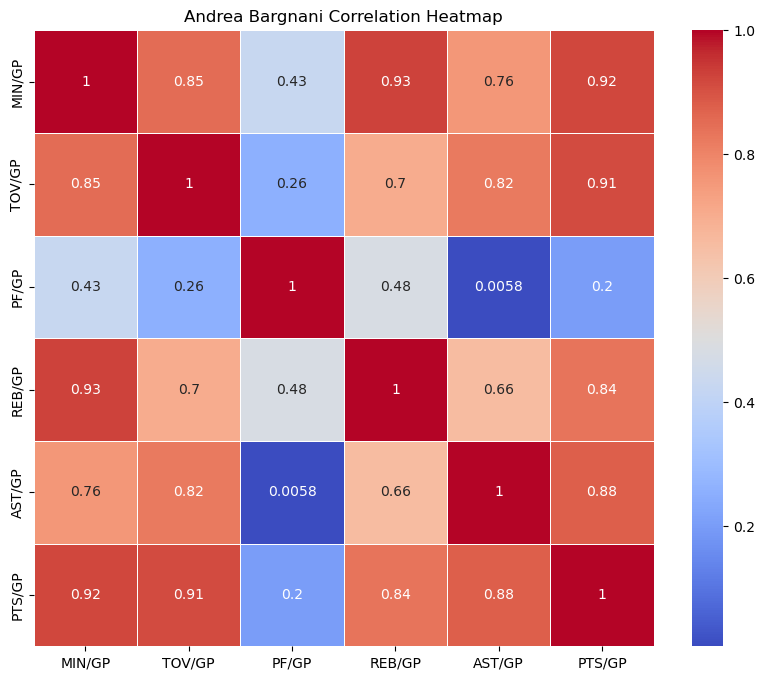

In [14]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(bargnani_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Andrea Bargnani Correlation Heatmap')
plt.show()

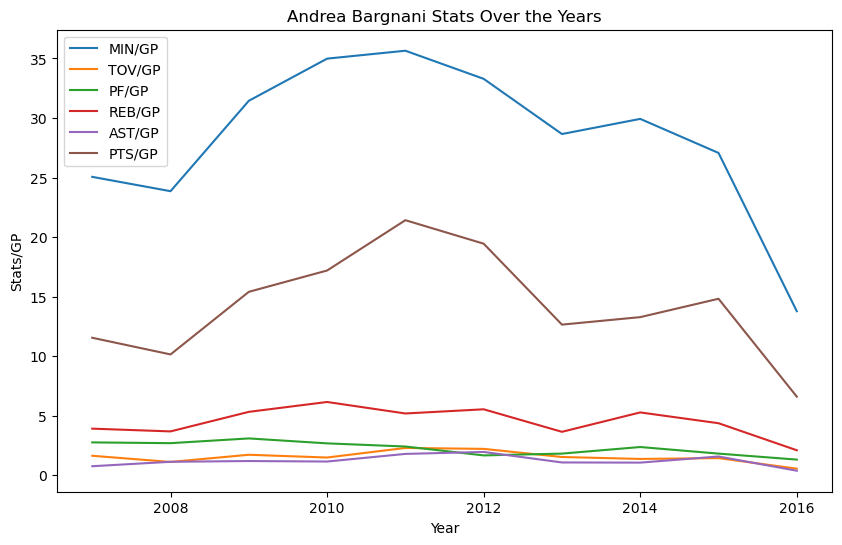

In [15]:
# Plot

andrea_bargnani_data.plot(x='Year', y=['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP'], kind='line', figsize=(10, 6))
plt.title('Andrea Bargnani Stats Over the Years')
plt.xlabel('Year')
plt.ylabel('Stats/GP')
plt.show()

In [16]:
# Bargnani Career averages

andrea_bargnani_averages = andrea_bargnani_data[['GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].mean()
andrea_bargnani_averages

GP        55.000000
MIN/GP    28.373586
TOV/GP     1.547127
PF/GP      2.272928
REB/GP     4.528744
AST/GP     1.218331
PTS/GP    14.257294
dtype: float64

# GM Decision

### Peak

Bargnani reached his statisical peak during the 2010 season.  Though he had higher PTS/GP and AST/GP in the following season, his GP and TOV/GP were worse in 2011.  Bargnani's GP and REB/GP were his highest, his MIN/GP were nearly at the peak and his PTS/GP had continued the growth from his previous seaons.

### Extend?
From 2007 through 2009 each of Bargnani's statitics trended in the postiive direction.  Signficantly he was able to play in at least 65 games per season, growing each year.  Time to extend him for three more seasons!  Beginning in 2010 and continuing into 2011 my decision to extend his contract looked good, except for an emerging issues with GP.  Following the 2012 season I reached the decision that I would not be extending the contract as his GP had declined from 80 in 2010 to 31 in 2012.  

### Let Him Go?
Bargnani will be let go after the 2012 season.  His inability to play consistently was the main factor.  As mentioned above his peak season of 2010 saw him play in 80 games and only 2 years later he could only participate in 31.  My decision was validated as the rest of Bargnani's career showed decline in all metrics.

# Voshon Lenard

In [17]:
# Select all entries for 'Voshon Lenard' from data

voshon_lenard_data = data[data['Player'] == 'Voshon Lenard']
voshon_lenard_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
12507,1996,Voshon Lenard,MIA,30.0,323.0,53.0,141.0,36.0,101.0,34.0,43.0,23.0,31.0,12.0,40.0,52.0,31.0,6.0,1.0,176.0
13082,1997,Voshon Lenard,MIA,73.0,2111.0,314.0,684.0,183.0,442.0,86.0,105.0,109.0,168.0,38.0,179.0,217.0,161.0,50.0,18.0,897.0
13628,1998,Voshon Lenard,MIA,81.0,2621.0,363.0,854.0,153.0,378.0,141.0,179.0,99.0,219.0,72.0,220.0,292.0,180.0,58.0,16.0,1020.0
14172,1999,Voshon Lenard,MIA,12.0,190.0,31.0,79.0,12.0,35.0,8.0,11.0,7.0,18.0,4.0,12.0,16.0,10.0,3.0,1.0,82.0
14689,2000,Voshon Lenard,MIA,53.0,1434.0,228.0,560.0,89.0,228.0,84.0,106.0,80.0,127.0,37.0,116.0,153.0,136.0,41.0,15.0,629.0
15183,2001,Voshon Lenard,DEN,80.0,2331.0,336.0,846.0,147.0,382.0,153.0,192.0,102.0,170.0,47.0,184.0,231.0,190.0,65.0,18.0,972.0
15715,2002,Voshon Lenard,DEN,71.0,1665.0,315.0,769.0,89.0,240.0,94.0,120.0,91.0,105.0,38.0,145.0,183.0,130.0,59.0,25.0,813.0
16200,2003,Voshon Lenard,TOR,63.0,1929.0,325.0,809.0,92.0,252.0,156.0,194.0,103.0,156.0,48.0,164.0,212.0,144.0,59.0,21.0,898.0
16736,2004,Voshon Lenard,DEN,73.0,2233.0,394.0,933.0,106.0,289.0,144.0,182.0,101.0,177.0,46.0,154.0,200.0,151.0,61.0,12.0,1038.0
17330,2005,Voshon Lenard,DEN,3.0,54.0,10.0,26.0,4.0,12.0,5.0,8.0,2.0,2.0,0.0,6.0,6.0,6.0,1.0,0.0,29.0


In [18]:
# Lenard Stats averaged by GP


voshon_lenard_data['MIN/GP'] = voshon_lenard_data['MIN'] / voshon_lenard_data['GP']
voshon_lenard_data['TOV/GP'] = voshon_lenard_data['TOV'] / voshon_lenard_data['GP']
voshon_lenard_data['PF/GP'] = voshon_lenard_data['PF'] / voshon_lenard_data['GP']
voshon_lenard_data['REB/GP'] = voshon_lenard_data['REB'] / voshon_lenard_data['GP']
voshon_lenard_data['AST/GP'] = voshon_lenard_data['AST'] / voshon_lenard_data['GP']
voshon_lenard_data['PTS/GP'] = voshon_lenard_data['PTS'] / voshon_lenard_data['GP']

voshon_lenard_data[['Year', 'GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].round(2)

/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/789334718.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voshon_lenard_data['MIN/GP'] = voshon_lenard_data['MIN'] / voshon_lenard_data['GP']
/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/789334718.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  voshon_lenard_data['TOV/GP'] = voshon_lenard_data['TOV'] / voshon_lenard_data['GP']
/var/folders/9r/_hmk04zd5k14sqtvhqzg3r7r0000gn/T/ipykernel_12463/789334718.py:6: SettingWi

,Year,GP,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
12507,1996,30.0,10.77,0.77,1.03,1.73,1.03,5.87
13082,1997,73.0,28.92,1.49,2.30,2.97,2.21,12.29
13628,1998,81.0,32.36,1.22,2.70,3.60,2.22,12.59
14172,1999,12.0,15.83,0.58,1.50,1.33,0.83,6.83
14689,2000,53.0,27.06,1.51,2.40,2.89,2.57,11.87
15183,2001,80.0,29.14,1.27,2.12,2.89,2.38,12.15
15715,2002,71.0,23.45,1.28,1.48,2.58,1.83,11.45
16200,2003,63.0,30.62,1.63,2.48,3.37,2.29,14.25
16736,2004,73.0,30.59,1.38,2.42,2.74,2.07,14.22
17330,2005,3.0,18.00,0.67,0.67,2.00,2.00,9.67


In [19]:
# Create correlation matrix

lenard_corr_matrix = voshon_lenard_data[['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].corr()
lenard_corr_matrix

,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
MIN/GP,1.000000,0.687299,0.892388,0.926802,0.836645,0.954495
TOV/GP,0.687299,1.000000,0.688991,0.607214,0.730552,0.650468
PF/GP,0.892388,0.688991,1.000000,0.828471,0.636713,0.772117
REB/GP,0.926802,0.607214,0.828471,1.000000,0.807516,0.898079
AST/GP,0.836645,0.730552,0.636713,0.807516,1.000000,0.836810
PTS/GP,0.954495,0.650468,0.772117,0.898079,0.836810,1.000000


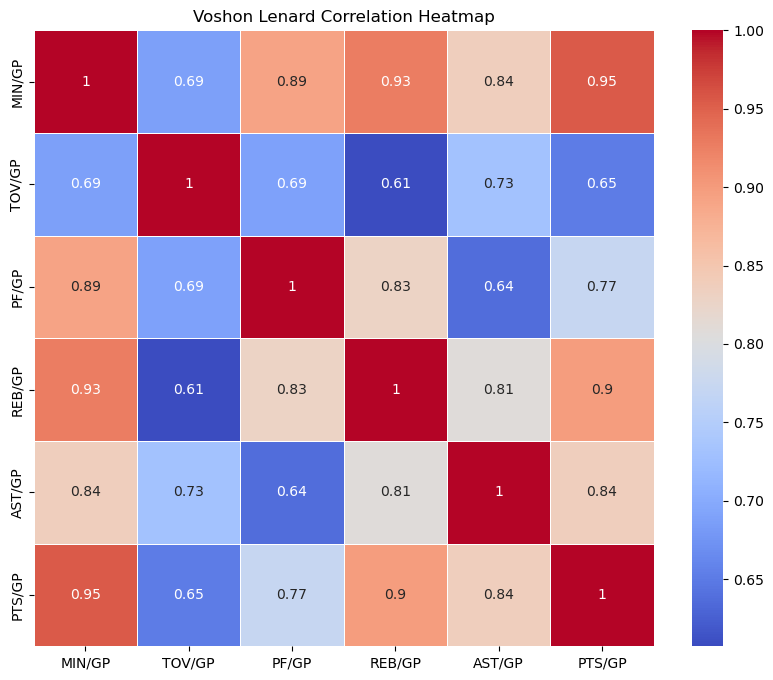

In [20]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(lenard_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Voshon Lenard Correlation Heatmap')
plt.show()

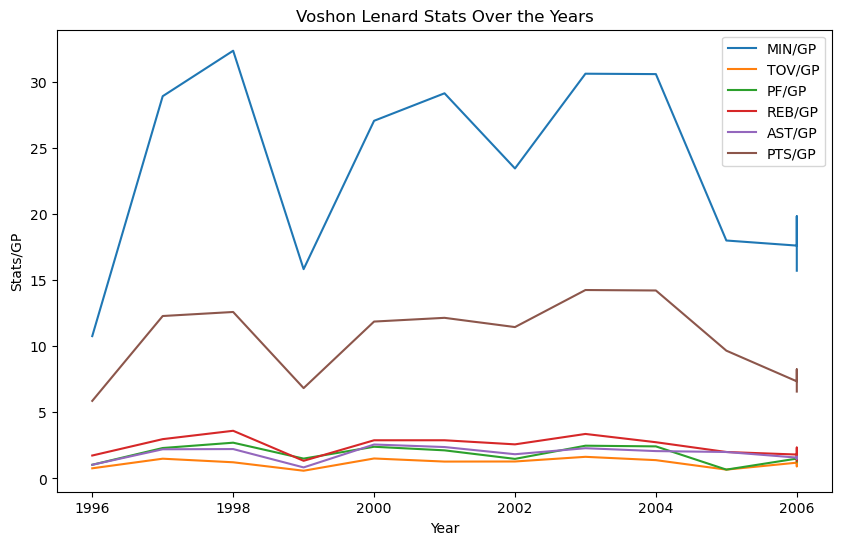

In [21]:
# Plot

voshon_lenard_data.plot(x='Year', y=['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP'], kind='line', figsize=(10, 6))
plt.title('Voshon Lenard Stats Over the Years')
plt.xlabel('Year')
plt.ylabel('Stats/GP')
plt.show()

In [22]:
# Voshon Lenard Career Avg.

voshon_lenard_averages = voshon_lenard_data[['GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].mean()
voshon_lenard_averages

GP        45.461538
MIN/GP    23.068595
TOV/GP     1.181092
PF/GP      1.818595
REB/GP     2.430688
AST/GP     1.856952
PTS/GP    10.258176
dtype: float64

# GM Decision

### Peak

Lenard enjoyed his statistical peak during the 1998 season.  The number GP, MIN/GP, and REB/GP were his highest averages.  Though his PTS/GP and AST/GP were not their highest, the 1998 season numbers are not far off from the highest values.  

### Extend?

From 1996 through 1998 Lenard showed improvement in each season.  His GP, MIN/GP, PTS/GP, AST/GP, REB/GP all increased season on season.  Let's extend him for another 3 years.  A real dip in 1999 is cause for concern but that was eased by a increase in the 2000 and 2001 seasons in most metrics with his GP being key.  After only being able to play in 12 games in 1999 he managed to play in 80 in 2001.  Another extention of the contract is granted.  From 2002 through 2004 Lenard showed consistentcy across our metrics but not the growth that I would have hoped for.

### Let Him Go?

Following the 2004 season it is time to let Lenard go into Free Agency.  Though Lenard managed to play more consistently, his numbers did not show the improvement that we had hoped for.  

# Kenny Anderson

In [23]:
# Select all entries for 'Kenny Anderson' from data
kenny_anderson_data = data[data['Player'] == 'Kenny Anderson']
kenny_anderson_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
10416,1992,Kenny Anderson,NJN,64.0,1086.0,187.0,480.0,3.0,13.0,73.0,98.0,97.0,68.0,38.0,89.0,127.0,203.0,67.0,9.0,450.0
10878,1993,Kenny Anderson,NJN,55.0,2010.0,370.0,850.0,7.0,25.0,180.0,232.0,153.0,140.0,51.0,175.0,226.0,449.0,96.0,11.0,927.0
11325,1994,Kenny Anderson,NJN,82.0,3135.0,576.0,1381.0,40.0,132.0,346.0,423.0,266.0,201.0,89.0,233.0,322.0,784.0,158.0,15.0,1538.0
11805,1995,Kenny Anderson,NJN,72.0,2689.0,411.0,1031.0,97.0,294.0,348.0,414.0,225.0,184.0,73.0,177.0,250.0,680.0,103.0,14.0,1267.0
12256,1996,Kenny Anderson,TOT,69.0,2344.0,349.0,834.0,92.0,256.0,260.0,338.0,146.0,178.0,63.0,140.0,203.0,575.0,111.0,14.0,1050.0
12257,1996,Kenny Anderson,NJN,31.0,1042.0,143.0,380.0,36.0,99.0,151.0,188.0,58.0,73.0,37.0,64.0,101.0,247.0,52.0,8.0,473.0
12258,1996,Kenny Anderson,CHH,38.0,1302.0,206.0,454.0,56.0,157.0,109.0,150.0,88.0,105.0,26.0,76.0,102.0,328.0,59.0,6.0,577.0
12803,1997,Kenny Anderson,POR,82.0,3081.0,485.0,1137.0,132.0,366.0,334.0,435.0,193.0,222.0,91.0,272.0,363.0,584.0,162.0,15.0,1436.0
13375,1998,Kenny Anderson,TOT,61.0,1858.0,268.0,674.0,57.0,160.0,153.0,194.0,143.0,135.0,39.0,134.0,173.0,345.0,87.0,1.0,746.0
13376,1998,Kenny Anderson,POR,45.0,1472.0,204.0,527.0,47.0,133.0,112.0,145.0,114.0,99.0,36.0,98.0,134.0,245.0,61.0,1.0,567.0


In [24]:
kenny_anderson_data[['Year', 'GP', 'MIN', 'TOV', 'PF', 'REB', 'AST', 'PTS']]

,Year,GP,MIN,TOV,PF,REB,AST,PTS
10416,1992,64.0,1086.0,97.0,68.0,127.0,203.0,450.0
10878,1993,55.0,2010.0,153.0,140.0,226.0,449.0,927.0
11325,1994,82.0,3135.0,266.0,201.0,322.0,784.0,1538.0
11805,1995,72.0,2689.0,225.0,184.0,250.0,680.0,1267.0
12256,1996,69.0,2344.0,146.0,178.0,203.0,575.0,1050.0
12257,1996,31.0,1042.0,58.0,73.0,101.0,247.0,473.0
12258,1996,38.0,1302.0,88.0,105.0,102.0,328.0,577.0
12803,1997,82.0,3081.0,193.0,222.0,363.0,584.0,1436.0
13375,1998,61.0,1858.0,143.0,135.0,173.0,345.0,746.0
13376,1998,45.0,1472.0,114.0,99.0,134.0,245.0,567.0


In [25]:
# Combine the stats when playing for multiple teams

kenny_anderson_data = kenny_anderson_data.groupby('Year').sum().reset_index()
kenny_anderson_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,1992,Kenny Anderson,NJN,64.0,1086.0,187.0,480.0,3.0,13.0,73.0,98.0,97.0,68.0,38.0,89.0,127.0,203.0,67.0,9.0,450.0
1,1993,Kenny Anderson,NJN,55.0,2010.0,370.0,850.0,7.0,25.0,180.0,232.0,153.0,140.0,51.0,175.0,226.0,449.0,96.0,11.0,927.0
2,1994,Kenny Anderson,NJN,82.0,3135.0,576.0,1381.0,40.0,132.0,346.0,423.0,266.0,201.0,89.0,233.0,322.0,784.0,158.0,15.0,1538.0
3,1995,Kenny Anderson,NJN,72.0,2689.0,411.0,1031.0,97.0,294.0,348.0,414.0,225.0,184.0,73.0,177.0,250.0,680.0,103.0,14.0,1267.0
4,1996,Kenny AndersonKenny AndersonKenny Anderson,TOTNJNCHH,138.0,4688.0,698.0,1668.0,184.0,512.0,520.0,676.0,292.0,356.0,126.0,280.0,406.0,1150.0,222.0,28.0,2100.0
5,1997,Kenny Anderson,POR,82.0,3081.0,485.0,1137.0,132.0,366.0,334.0,435.0,193.0,222.0,91.0,272.0,363.0,584.0,162.0,15.0,1436.0
6,1998,Kenny AndersonKenny AndersonKenny Anderson,TOTPORBOS,122.0,3716.0,536.0,1348.0,114.0,320.0,306.0,388.0,286.0,270.0,78.0,268.0,346.0,690.0,174.0,2.0,1492.0
7,1999,Kenny Anderson,BOS,34.0,1010.0,161.0,357.0,6.0,24.0,84.0,101.0,71.0,78.0,24.0,79.0,103.0,193.0,33.0,2.0,412.0
8,2000,Kenny Anderson,BOS,82.0,2593.0,434.0,986.0,85.0,220.0,196.0,253.0,130.0,230.0,55.0,170.0,225.0,420.0,139.0,8.0,1149.0
9,2001,Kenny Anderson,BOS,33.0,849.0,88.0,227.0,11.0,33.0,59.0,71.0,52.0,62.0,16.0,57.0,73.0,134.0,44.0,2.0,246.0


In [26]:
# dropping last row

kenny_anderson_data = kenny_anderson_data[kenny_anderson_data['Year'] != 5988]
kenny_anderson_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,1992,Kenny Anderson,NJN,64.0,1086.0,187.0,480.0,3.0,13.0,73.0,98.0,97.0,68.0,38.0,89.0,127.0,203.0,67.0,9.0,450.0
1,1993,Kenny Anderson,NJN,55.0,2010.0,370.0,850.0,7.0,25.0,180.0,232.0,153.0,140.0,51.0,175.0,226.0,449.0,96.0,11.0,927.0
2,1994,Kenny Anderson,NJN,82.0,3135.0,576.0,1381.0,40.0,132.0,346.0,423.0,266.0,201.0,89.0,233.0,322.0,784.0,158.0,15.0,1538.0
3,1995,Kenny Anderson,NJN,72.0,2689.0,411.0,1031.0,97.0,294.0,348.0,414.0,225.0,184.0,73.0,177.0,250.0,680.0,103.0,14.0,1267.0
4,1996,Kenny AndersonKenny AndersonKenny Anderson,TOTNJNCHH,138.0,4688.0,698.0,1668.0,184.0,512.0,520.0,676.0,292.0,356.0,126.0,280.0,406.0,1150.0,222.0,28.0,2100.0
5,1997,Kenny Anderson,POR,82.0,3081.0,485.0,1137.0,132.0,366.0,334.0,435.0,193.0,222.0,91.0,272.0,363.0,584.0,162.0,15.0,1436.0
6,1998,Kenny AndersonKenny AndersonKenny Anderson,TOTPORBOS,122.0,3716.0,536.0,1348.0,114.0,320.0,306.0,388.0,286.0,270.0,78.0,268.0,346.0,690.0,174.0,2.0,1492.0
7,1999,Kenny Anderson,BOS,34.0,1010.0,161.0,357.0,6.0,24.0,84.0,101.0,71.0,78.0,24.0,79.0,103.0,193.0,33.0,2.0,412.0
8,2000,Kenny Anderson,BOS,82.0,2593.0,434.0,986.0,85.0,220.0,196.0,253.0,130.0,230.0,55.0,170.0,225.0,420.0,139.0,8.0,1149.0
9,2001,Kenny Anderson,BOS,33.0,849.0,88.0,227.0,11.0,33.0,59.0,71.0,52.0,62.0,16.0,57.0,73.0,134.0,44.0,2.0,246.0


In [27]:
# Anderson Stats averaged by GP


kenny_anderson_data['MIN/GP'] = kenny_anderson_data['MIN'] / kenny_anderson_data['GP']
kenny_anderson_data['TOV/GP'] = kenny_anderson_data['TOV'] / kenny_anderson_data['GP']
kenny_anderson_data['PF/GP'] = kenny_anderson_data['PF'] / kenny_anderson_data['GP']
kenny_anderson_data['REB/GP'] = kenny_anderson_data['REB'] / kenny_anderson_data['GP']
kenny_anderson_data['AST/GP'] = kenny_anderson_data['AST'] / kenny_anderson_data['GP']
kenny_anderson_data['PTS/GP'] = kenny_anderson_data['PTS'] / kenny_anderson_data['GP']

kenny_anderson_data[['Year', 'GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].round(2)

,Year,GP,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
0,1992,64.0,16.97,1.52,1.06,1.98,3.17,7.03
1,1993,55.0,36.55,2.78,2.55,4.11,8.16,16.85
2,1994,82.0,38.23,3.24,2.45,3.93,9.56,18.76
3,1995,72.0,37.35,3.12,2.56,3.47,9.44,17.60
4,1996,138.0,33.97,2.12,2.58,2.94,8.33,15.22
5,1997,82.0,37.57,2.35,2.71,4.43,7.12,17.51
6,1998,122.0,30.46,2.34,2.21,2.84,5.66,12.23
7,1999,34.0,29.71,2.09,2.29,3.03,5.68,12.12
8,2000,82.0,31.62,1.59,2.80,2.74,5.12,14.01
9,2001,33.0,25.73,1.58,1.88,2.21,4.06,7.45


In [28]:
# Create correlation matrix

anderson_corr_matrix = kenny_anderson_data[['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].corr()
anderson_corr_matrix

,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
MIN/GP,1.000000,0.845398,0.846318,0.901808,0.925204,0.948160
TOV/GP,0.845398,1.000000,0.513426,0.779875,0.937927,0.905358
PF/GP,0.846318,0.513426,1.000000,0.768154,0.677887,0.728790
REB/GP,0.901808,0.779875,0.768154,1.000000,0.818460,0.862543
AST/GP,0.925204,0.937927,0.677887,0.818460,1.000000,0.951451
PTS/GP,0.948160,0.905358,0.728790,0.862543,0.951451,1.000000


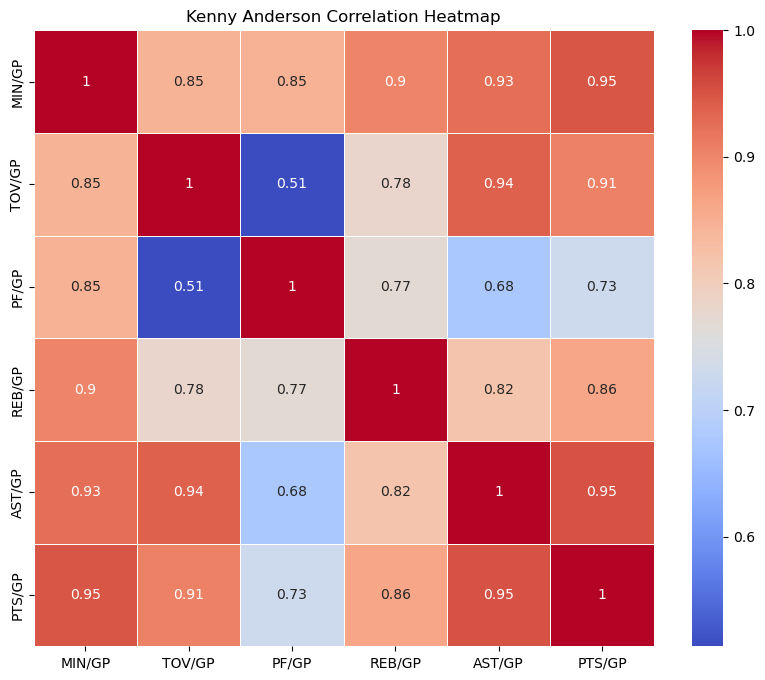

In [29]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(anderson_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Kenny Anderson Correlation Heatmap')
plt.show()

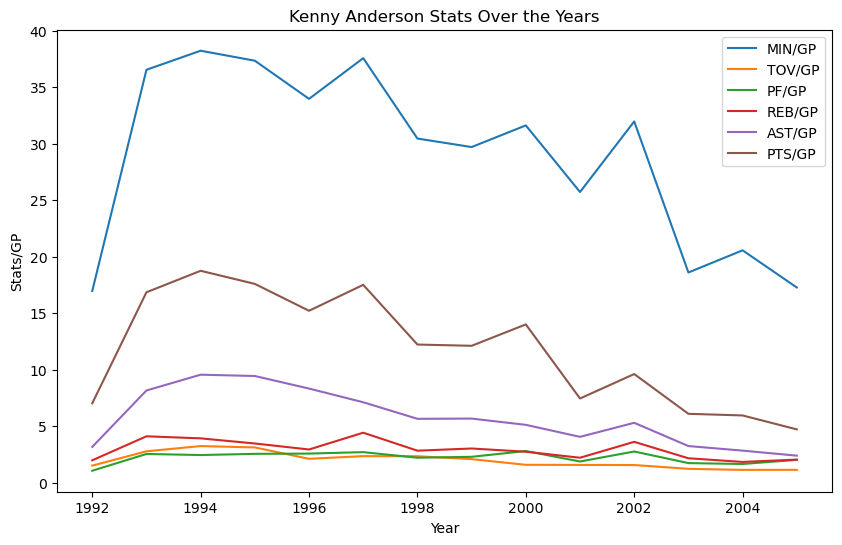

In [30]:
# Plot of Anderson Career


kenny_anderson_data.plot(x='Year', y=['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP'], kind='line', figsize=(10, 6))
plt.title('Kenny Anderson Stats Over the Years')
plt.xlabel('Year')
plt.ylabel('Stats/GP')
plt.show()

In [31]:
# Kenny Anderson Career Avg.

kenny_anderson_averages = kenny_anderson_data[['GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].mean()
kenny_anderson_averages

GP        78.000000
MIN/GP    29.041353
TOV/GP     1.985769
PF/GP      2.233990
REB/GP     2.953761
AST/GP     5.721127
PTS/GP    11.798204
dtype: float64

# GM Decision

### Peak

Anderson reached his peak during the 1994 season.  During the 1994, Anderson produced his highest GP, MIN/GP, AST/GP and PTS/GP, all of which I value as GM.  His REB/GP was also the third highest in high career.

### Extend?

From the 1992 through the 1994 season, Anderson showed improvement each season.  That deserves an extension, 3 more years.  From 1995 through 1997, Anderson continued to produce consistently, reaching his highest REB/GP in 1997 and keeping his other metrics close to their peak.  Lets extend him for another 3 years.  1998 through 2000 we saw a dip in his production across all of our important metrics.  Though consistent, it looks time to let Anderson leave through Free Agency.

### Let Him Go?

Following the 2000 season it is time to let Anderson go into Free Agency.  His production contiued to decline for the remainder of his career which validated our decision to let him go following the 2000 season.

# B.J. Armstrong

In [32]:
# Select all entries for 'B.J. Armstrong' from data

bj_armstrong_data = data[data['Player'] == 'B.J. Armstrong']
bj_armstrong_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
9520,1990,B.J. Armstrong,CHI,81.0,1291.0,190.0,392.0,3.0,6.0,69.0,78.0,83.0,105.0,19.0,83.0,102.0,199.0,46.0,6.0,452.0
9982,1991,B.J. Armstrong,CHI,82.0,1731.0,304.0,632.0,15.0,30.0,97.0,111.0,107.0,118.0,25.0,124.0,149.0,301.0,70.0,4.0,720.0
10424,1992,B.J. Armstrong,CHI,82.0,1875.0,335.0,697.0,35.0,87.0,104.0,129.0,94.0,88.0,19.0,126.0,145.0,266.0,46.0,5.0,809.0
10883,1993,B.J. Armstrong,CHI,82.0,2492.0,408.0,818.0,63.0,139.0,130.0,151.0,83.0,169.0,27.0,122.0,149.0,330.0,66.0,6.0,1009.0
11332,1994,B.J. Armstrong,CHI,82.0,2770.0,479.0,1007.0,60.0,135.0,194.0,227.0,131.0,147.0,28.0,142.0,170.0,323.0,80.0,9.0,1212.0
11809,1995,B.J. Armstrong,CHI,82.0,2577.0,418.0,894.0,108.0,253.0,206.0,233.0,103.0,159.0,25.0,161.0,186.0,244.0,84.0,8.0,1150.0
12264,1996,B.J. Armstrong,GSW,82.0,2262.0,340.0,727.0,98.0,207.0,234.0,279.0,128.0,147.0,22.0,162.0,184.0,401.0,68.0,6.0,1012.0
12808,1997,B.J. Armstrong,GSW,49.0,1020.0,148.0,327.0,25.0,90.0,68.0,79.0,53.0,56.0,7.0,67.0,74.0,126.0,25.0,2.0,389.0
13382,1998,B.J. Armstrong,TOT,66.0,831.0,105.0,213.0,9.0,35.0,42.0,50.0,42.0,74.0,16.0,60.0,76.0,150.0,29.0,0.0,261.0
13383,1998,B.J. Armstrong,GSW,4.0,59.0,6.0,19.0,0.0,1.0,5.0,7.0,7.0,6.0,4.0,3.0,7.0,6.0,4.0,0.0,17.0


In [33]:
bj_armstrong_data[['Year', 'GP', 'MIN', 'TOV', 'PF', 'REB', 'AST', 'PTS']]

,Year,GP,MIN,TOV,PF,REB,AST,PTS
9520,1990,81.0,1291.0,83.0,105.0,102.0,199.0,452.0
9982,1991,82.0,1731.0,107.0,118.0,149.0,301.0,720.0
10424,1992,82.0,1875.0,94.0,88.0,145.0,266.0,809.0
10883,1993,82.0,2492.0,83.0,169.0,149.0,330.0,1009.0
11332,1994,82.0,2770.0,131.0,147.0,170.0,323.0,1212.0
11809,1995,82.0,2577.0,103.0,159.0,186.0,244.0,1150.0
12264,1996,82.0,2262.0,128.0,147.0,184.0,401.0,1012.0
12808,1997,49.0,1020.0,53.0,56.0,74.0,126.0,389.0
13382,1998,66.0,831.0,42.0,74.0,76.0,150.0,261.0
13383,1998,4.0,59.0,7.0,6.0,7.0,6.0,17.0


In [34]:
bj_armstrong_data = bj_armstrong_data.groupby('Year').sum().reset_index()
bj_armstrong_data

,Year,Player,Team,GP,MIN,FGM,FGA,3PM,3PA,FTM,FTA,TOV,PF,ORB,DRB,REB,AST,STL,BLK,PTS
0,1990,B.J. Armstrong,CHI,81.0,1291.0,190.0,392.0,3.0,6.0,69.0,78.0,83.0,105.0,19.0,83.0,102.0,199.0,46.0,6.0,452.0
1,1991,B.J. Armstrong,CHI,82.0,1731.0,304.0,632.0,15.0,30.0,97.0,111.0,107.0,118.0,25.0,124.0,149.0,301.0,70.0,4.0,720.0
2,1992,B.J. Armstrong,CHI,82.0,1875.0,335.0,697.0,35.0,87.0,104.0,129.0,94.0,88.0,19.0,126.0,145.0,266.0,46.0,5.0,809.0
3,1993,B.J. Armstrong,CHI,82.0,2492.0,408.0,818.0,63.0,139.0,130.0,151.0,83.0,169.0,27.0,122.0,149.0,330.0,66.0,6.0,1009.0
4,1994,B.J. Armstrong,CHI,82.0,2770.0,479.0,1007.0,60.0,135.0,194.0,227.0,131.0,147.0,28.0,142.0,170.0,323.0,80.0,9.0,1212.0
5,1995,B.J. Armstrong,CHI,82.0,2577.0,418.0,894.0,108.0,253.0,206.0,233.0,103.0,159.0,25.0,161.0,186.0,244.0,84.0,8.0,1150.0
6,1996,B.J. Armstrong,GSW,82.0,2262.0,340.0,727.0,98.0,207.0,234.0,279.0,128.0,147.0,22.0,162.0,184.0,401.0,68.0,6.0,1012.0
7,1997,B.J. Armstrong,GSW,49.0,1020.0,148.0,327.0,25.0,90.0,68.0,79.0,53.0,56.0,7.0,67.0,74.0,126.0,25.0,2.0,389.0
8,1998,B.J. ArmstrongB.J. ArmstrongB.J. Armstrong,TOTGSWCHH,132.0,1662.0,210.0,426.0,18.0,70.0,84.0,100.0,84.0,148.0,32.0,120.0,152.0,300.0,58.0,0.0,522.0
9,1999,B.J. ArmstrongB.J. ArmstrongB.J. Armstrong,TOTCHHORL,64.0,716.0,80.0,176.0,14.0,30.0,36.0,42.0,50.0,62.0,4.0,74.0,78.0,122.0,24.0,0.0,210.0


In [35]:
# Armstrong Stats averaged by GP

import pandas as pd

bj_armstrong_data['MIN/GP'] = bj_armstrong_data['MIN'] / bj_armstrong_data['GP']
bj_armstrong_data['TOV/GP'] = bj_armstrong_data['TOV'] / bj_armstrong_data['GP']
bj_armstrong_data['PF/GP'] = bj_armstrong_data['PF'] / bj_armstrong_data['GP']
bj_armstrong_data['REB/GP'] = bj_armstrong_data['REB'] / bj_armstrong_data['GP']
bj_armstrong_data['AST/GP'] = bj_armstrong_data['AST'] / bj_armstrong_data['GP']
bj_armstrong_data['PTS/GP'] = bj_armstrong_data['PTS'] / bj_armstrong_data['GP']

bj_armstrong_data[['Year', 'GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].round(2)

,Year,GP,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
0,1990,81.0,15.94,1.02,1.30,1.26,2.46,5.58
1,1991,82.0,21.11,1.30,1.44,1.82,3.67,8.78
2,1992,82.0,22.87,1.15,1.07,1.77,3.24,9.87
3,1993,82.0,30.39,1.01,2.06,1.82,4.02,12.30
4,1994,82.0,33.78,1.60,1.79,2.07,3.94,14.78
5,1995,82.0,31.43,1.26,1.94,2.27,2.98,14.02
6,1996,82.0,27.59,1.56,1.79,2.24,4.89,12.34
7,1997,49.0,20.82,1.08,1.14,1.51,2.57,7.94
8,1998,132.0,12.59,0.64,1.12,1.15,2.27,3.95
9,1999,64.0,11.19,0.78,0.97,1.22,1.91,3.28


In [36]:
# Create correlation matrix

armstrong_corr_matrix = bj_armstrong_data[['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].corr()
armstrong_corr_matrix

,MIN/GP,TOV/GP,PF/GP,REB/GP,AST/GP,PTS/GP
MIN/GP,1.000000,0.715876,0.862922,0.903359,0.757552,0.989573
TOV/GP,0.715876,1.000000,0.494317,0.815887,0.713041,0.714604
PF/GP,0.862922,0.494317,1.000000,0.769795,0.728373,0.847776
REB/GP,0.903359,0.815887,0.769795,1.000000,0.796563,0.928767
AST/GP,0.757552,0.713041,0.728373,0.796563,1.000000,0.778530
PTS/GP,0.989573,0.714604,0.847776,0.928767,0.778530,1.000000


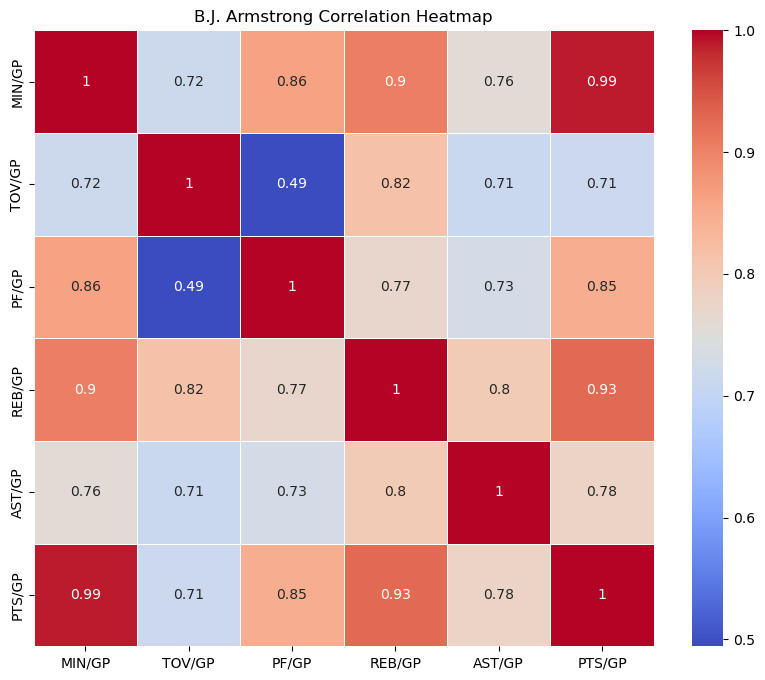

In [37]:
# Create a heatmap of the correlation matrix

plt.figure(figsize=(10, 8))
sns.heatmap(armstrong_corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('B.J. Armstrong Correlation Heatmap')
plt.show()

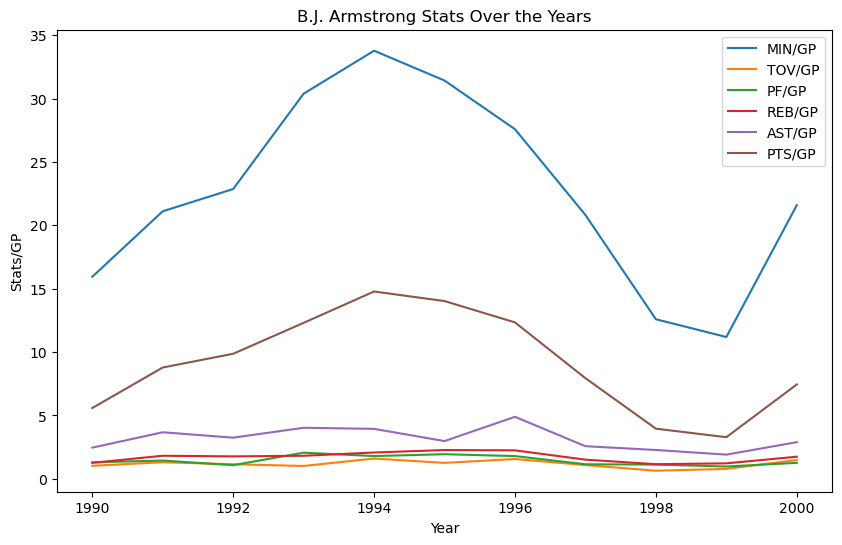

In [38]:
# Plot of Armstrong Career

bj_armstrong_data.plot(x='Year', y=['MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP'], kind='line', figsize=(10, 6))
plt.title('B.J. Armstrong Stats Over the Years')
plt.xlabel('Year')
plt.ylabel('Stats/GP')
plt.show()

In [39]:
# B.J. Armstrong Career Avg.

bj_armstrong_averages = bj_armstrong_data[['GP', 'MIN/GP', 'TOV/GP', 'PF/GP', 'REB/GP', 'AST/GP', 'PTS/GP']].mean()
bj_armstrong_averages

GP        76.818182
MIN/GP    22.662194
TOV/GP     1.171224
PF/GP      1.444176
REB/GP     1.715298
AST/GP     3.167272
PTS/GP     9.117893
dtype: float64

### Peak

Armstrong saw his peak during the 1994 season.  That season he played all 82 games, had his higest MIN/GP and PTS/GP.  Additionally, his AST/GP and REB/GP were at levels close to what his peak for those categories are. 

### Extend?

From the 1990 through 1992 seasons, Armstrong showed growth in our metrics.  We were mostly impressed by him playing in EVERY game during those three seasons.  That availability is enough for us to extend him for another 3 seasons.  the 1993 through 1995 seasons showed more progress in our metrics, during these seasons he reached his peak in our metrics which we reward with another 3 years.  

### Let Him Go?

Beginning with the 1996 season, Armstrong's output begin a substantial decline across all our metrics.  Sadly after the 1998 season it was time to let Armstrong leave through Free Agency as he had, statistically, only decline with each season.